In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
#Ensure that the CHP/GIS dataset CSV is within your Google Drive and proper filepath is listed below before running this cell.
df = pd.read_csv('/content/drive/MyDrive/CHP_GIS_SpatialData_Dataset.csv')
df.head()

,A,DOI/URL,Title,Author,Journal,Publisher,Publication Year,Data Collected,Data Deposited (subjective interpretation),Data Deposited (Federer et al.),DOI/URL of Data Deposit,Data Repository,DOI of Data Paper (other citations),Funding Source,Country of Study,Province/Municipality,Software Used
0,Iriye,https://doi.org/10.1038/s40494-025-02085-z,A GIS approach to the spatial organization and...,Ziqi Li; Qingwei Meng; Xiaoning Lu; Ziyu Fang;...,Heritage Science,Springer Nature NPJ,2025,Calibrated radiocarbon data; Archaeological su...,Access restricted,Access restricted,NaN,Unknown,See references,Archaeological Talent Promotion Programme of C...,China,Qinghai Province; Sichuan Province; Gansu Prov...,ArcGIS version unspecified
1,Iriye,https://doi.org/10.1186/s40494-024-01258-6,Determination of the temporal–spatial distribu...,Xiaojia Li,Heritage Science,Springer Nature NPJ,2024,Geographic coordinates; Digital Elevation Mode...,In paper; upon request,Upon request,NaN,Unknown,See references,None (no external funding),China,Shandong Province,ArcGIS version 10.8
2,Iriye,https://doi.org/10.1186/s40494-020-00455-3,Evaluation of metadata describing topographic ...,Marta Kuźma; Albina Mościcka,Heritage Science,Springer Nature NPJ,2020,Historical maps; Library metadata,In paper,In paper,NaN,Unknown,See references,Military University of Technology,Poland,NaN,Millennium; 2019 Sierra (Innovative)
3,Iriye,https://doi.org/10.1186/s40494-024-01265-7,Emerging trends in GIS application on cultural...,Beibei Liu; Cong Wu; Weixing Xu; Yingning Shen...,Heritage Science,Springer Nature NPJ,2024,WoS Core Collection bibliographic data,In paper,In paper,NaN,Unknown,See references,National Natural Science Foundation of China,Global,NaN,CiteSpace; R
4,Iriye,https://doi.org/10.1186/s40494-023-01044-w,Analysis of the relationship between the tempo...,Yu Li,Heritage Science,Springer Nature NPJ,2023,Census data; Geographic coordinates; Provincia...,In paper,In paper,NaN,Unknown,See references,None (no external funding),China,Henan Province,ArcGIS version 10.5


In [6]:
#Finding all instances of data repositories used
repository_df = df['Data Repository'].str.split('; ')
repository_explode = repository_df.explode()
repository_explode.value_counts()

,count
Data Repository,
Unknown,85
GitHub,4
Museo Nacional y Centro de Investigación de Altamira,2
MDPI,2
Zenodo,2
Canmore,1
Scotland’s Rock Art Project,1
Universidad de Jaén,1
"Système d'Information Géologique et Minière (SIGM) / Ministère des Mines, de l’Industrie et du Développement Technologique (MINMIDT)",1


In [7]:
#Counting articles which deposited in multiple repositories
df['Repository Count'] = repository_df.apply(len)
filtered_repository_count = df['Repository Count'][df['Repository Count']>1]
filtered_repository_count

,Repository Count
9,2
11,2
22,2
67,2
73,2


In [8]:
#Counting how many data deposits in repositories were made
known_repository = repository_explode[repository_explode != "Unknown"]
known_repository.value_counts()
len(known_repository)

20

In [9]:
#Splitting software types into individual lists
software_df = df["Software Used"]
df['software_df_split'] = df["Software Used"].str.split('; ')

#Exploding software column to create a cell for each individual software type, counting instances of each
software_exploded = df['software_df_split'].explode()
software_exploded.value_counts()

,count
software_df_split,
ArcGIS version unspecified,14
ArcGIS version 10.8,13
QGIS version unspecified,13
R,4
Google Earth,4
...,...
ArcGIS Map Viewer version unspecified,1
MAXQDA 24,1
Snap,1


In [10]:
#Making text lowercase to match
software_lower = software_exploded.str.lower()
arc_software = software_exploded[software_lower.str.startswith('arc')]
arc_software = pd.concat([arc_software, software_exploded[software_lower.str.startswith('esri arc')]])

#Dropping instances of Arches
arc_software_clean = arc_software[~arc_software.str.contains("Arches")]

#Splitting version numbers from software
arc_split = arc_software_clean.str.split("version")
arc_split.head()

,software_df_split
0,"[ArcGIS , unspecified]"
1,"[ArcGIS , 10.8]"
4,"[ArcGIS , 10.5 ]"
6,"[ArcGIS , unspecified]"
8,"[ArcGIS , unspecified]"


In [11]:
#Counting number of ArcGIS and QGIS uses

arcgis_instances = len(software_exploded[software_lower.str.startswith('arcgis')])
qgis_instances = len(software_exploded[software_lower.str.startswith('qgis')])

print("Number of ArcGIS uses:", arcgis_instances)
print("Number of QGIS uses:", qgis_instances)

Number of ArcGIS uses: 64
Number of QGIS uses: 23


In [12]:
#Same procedure for QGIS, along with splitting on "version"
q_software = software_exploded[software_lower.str.startswith('q')]
q_split = q_software.str.split("version")
q_split.head()

,software_df_split
9,"[QGIS , 3.4.5-Madeira]"
11,"[QGIS , unspecified]"
17,"[QGIS , unspecified]"
19,"[QGIS , unspecified]"
23,"[QGIS , unspecified]"


In [13]:
#Creating dataframe for HGIS instances
h_software = q_software = software_exploded[software_lower.str.startswith('hgis')]
hgis = h_software.value_counts().rename_axis('Software').reset_index(name='Counts')
hgis['Version'] = 'unspecified'
hgis

,Software,Counts,Version
0,HGIS,4,unspecified


In [14]:
#Combining QGIS and ArcGIS software lists, grouping by unique type, and adding a column
split_combine = pd.concat([arc_split, q_split], axis=0)
software_counts = split_combine.value_counts().rename_axis('Software type').reset_index(name='counts')

#Separating software type and verison into separate columns and appending counts
version_separate = pd.DataFrame(software_counts['Software type'].to_list(), columns=['Software', 'Version'])
version_separate["Counts"] = software_counts['counts']
version_separate = pd.concat([version_separate, hgis])
version_separate.head()

,Software,Version,Counts
0,ArcGIS,unspecified,14
1,ArcGIS,10.8,13
2,QGIS,unspecified,13
3,ArcGIS Pro,unspecified,3
4,ArcGIS,10.7,3


In [15]:
#Visualizing most common software types
fig = px.sunburst(version_separate, path=['Software', 'Version'], values='Counts', color='Software', width=1200, height=700)
fig.update_layout(uniformtext=dict(minsize=50))
fig.show()

In [16]:
7#Determining how many papers used more than one kind of software
df["Software Count"] = df['software_df_split'].apply(len)
filtered_software_count = df["Software Count"][df["Software Count"]>1]
len(filtered_software_count)

52

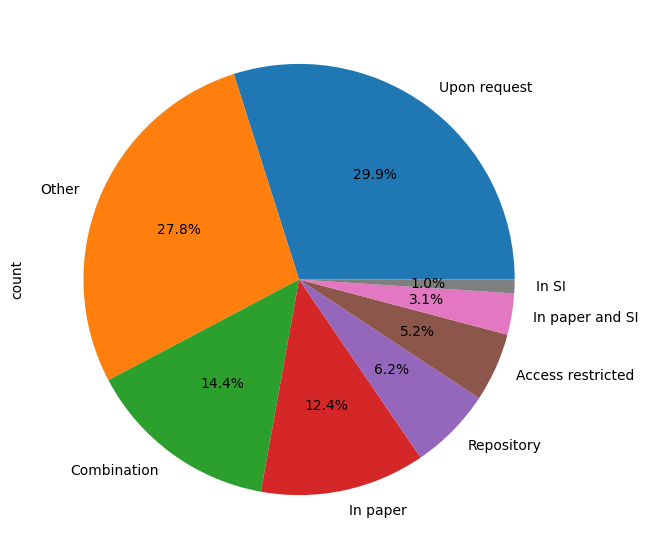

In [17]:
plt.figure(figsize= (12, 7))
df["Data Deposited (Federer et al.)"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    )
# plt.title("Data Deposit Method")
plt.show()

In [18]:
country_split = df["Country of Study"].str.split('; ')
country_cleaned = country_split.explode()

#Filtering out global
country_filtered = country_cleaned[country_cleaned.apply(lambda x: not isinstance(x, str) or len(x) <= 25)]
country_filtered

,Country of Study
0,China
1,China
2,Poland
3,Global
4,China
...,...
95,Ireland
96,China
97,Saudi Arabia
98,China


In [19]:
#Total number of indiviudal country studies
len(country_filtered.value_counts())

36

In [20]:
#Total number of studies in China
sum(country_filtered.str.count('China'))

37

In [21]:
#Total number of studies in Spain
sum(country_filtered.str.count('Spain'))

12

In [22]:
#Total number of studies in Italy
sum(country_filtered.str.count('Italy'))

7

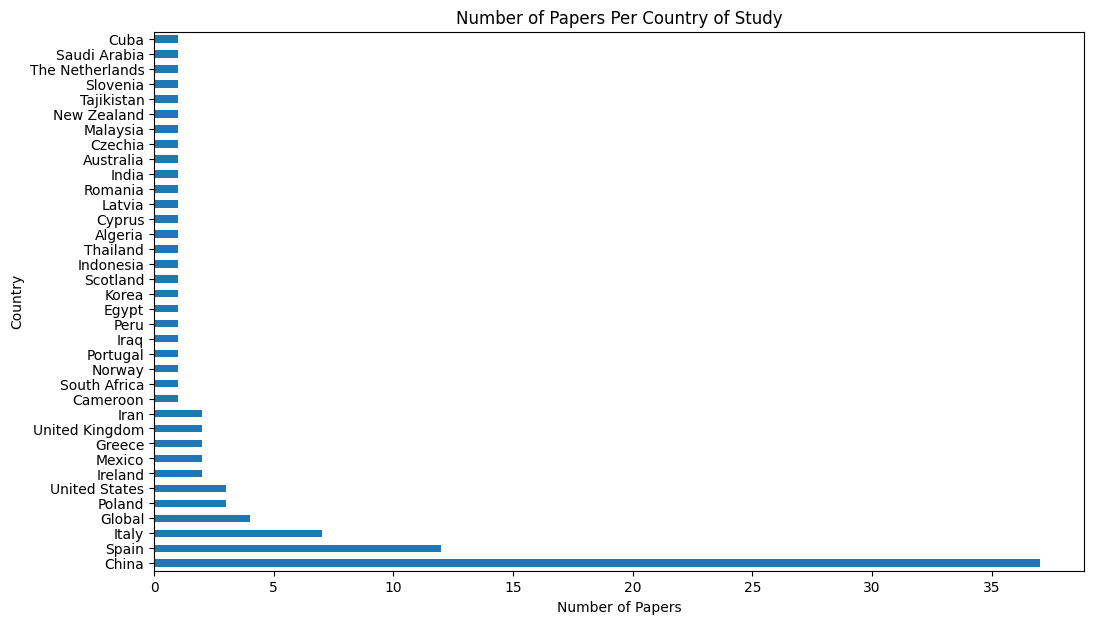

In [23]:
plt.figure(figsize= (12, 7))
country_filtered.value_counts().plot(
    kind="barh",
    # autopct="%1.1f%%",
    )
plt.title("Number of Papers Per Country of Study")
plt.xlabel("Number of Papers")
plt.ylabel("Country")
plt.show()

In [24]:
# Counting number of unique datatypes post-cleaning
datatype_df = df["Data Collected"]
datatype_df_lower = datatype_df.str.lower()
datatype_df_split = datatype_df_lower.str.split('; ')
datatype_exploded = datatype_df_split.explode()

datatype_unique = datatype_exploded.value_counts()
datatype_unique.shape

(366,)

In [25]:
#Shortening longer instances of common datatypes for the purposes of visualization
datatype_clean = datatype_exploded.replace('digital elevation model (dem) data', 'dem')
datatype_clean = datatype_clean.replace('digital surface model (dsm) data', 'dsm')
datatype_clean = datatype_clean.replace('digital terrain model (dtm) data', 'dtm')
datatype_clean = datatype_clean.replace('light detection and ranging (lidar) data', 'lidar')
datatype_clean = datatype_clean.replace('terrestrial laser scanner (tls) data', 'tls')

In [26]:
#Verifying cleaning
cleaned_unique = datatype_clean.value_counts()
cleaned_unique.head(10)

,count
Data Collected,
dem,29
historical maps,17
lidar,10
dtm,7
satellite imagery,7
elevation data,6
geographic coordinates,6
tls,6
geospatial data,6


In [27]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
stopwords = STOPWORDS

In [29]:
#Removes instances of the word "data" from our dataset
stopwords.add("data")

In [30]:
wc = WordCloud(background_color="white",
               stopwords=(stopwords),
               width=1000,
               height=600,
               colormap="plasma",
               collocations=True,
               max_words=50,).generate(' '.join(datatype_clean))

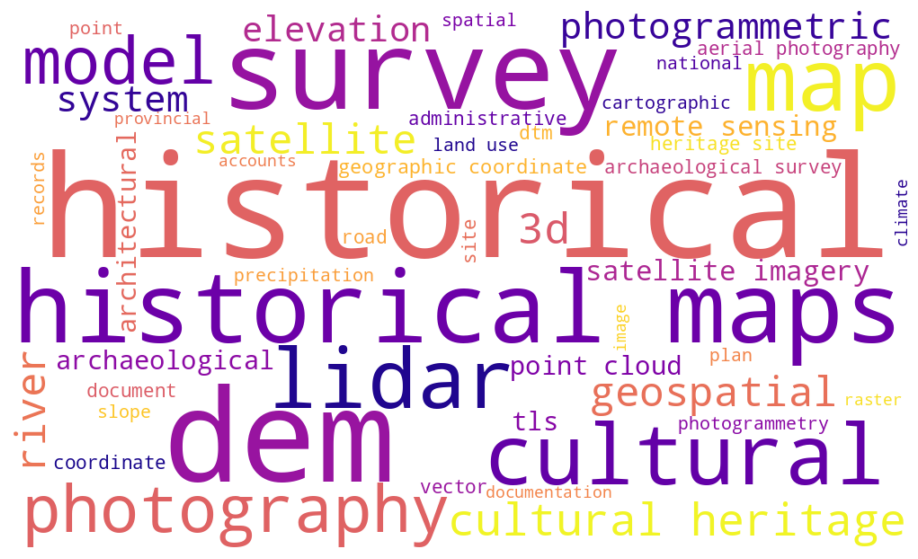

In [31]:
plt.figure(figsize= (12, 7))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [32]:
#Verifying total amount of self-funded articles and overlap for other forms of funding
funding_split = df['Funding Source'].str.split('; ')
funding_explode = funding_split.explode()
funding_counts = funding_explode.value_counts()
funding_counts.head()

,count
Funding Source,
None (no external funding),23
National Natural Science Foundation of China,9
None (not listed),5
"Department of Innovation, Industry, Tourism and Trade of the Regional Government of Cantabria",2
Arts and Humanities Research Council UK,1


In [33]:
#Providing total counts for articles from specific journals
df['Journal'].value_counts()

,count
Journal,
Heritage Science,16
Remote Sensing,16
Sustainability,14
Land,11
ISPRS International Journal of Geo-Information,11
Scientific Reports,10
Journal of Cultural Heritage,10
Digital Applications in Archaeology and Cultural Heritage,8
Built Heritage,4


In [34]:
#Providing total counts for articles from specific publishers
df["Publisher"].value_counts()

,count
Publisher,
MDPI,52
Elsevier ScienceDirect,18
Springer Nature NPJ,16
Springer Nature,10
SpringerOpen,4
